<a href="https://colab.research.google.com/github/shahinVakilinia/Assignment-4-for-UoT-Students/blob/main/EQ_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**

In [11]:
# prompt: Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path # import Path class
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec



# set up directories
input_dir = Path(r'./inputs')
output_dir = Path(r'./outputs')
output_dir.mkdir(parents=True, exist_ok=True)


**Functions**

In [9]:
def data_read():
    """
    Read the rawa data from Google drive location
    param df:Dataset Locations
    return: returns the pre-processed df
    """
    drive.mount('/content/gdrive')
    df_providers = pd.read_csv('/content/gdrive/MyDrive/EQBank/providers.csv')
    df_beneficiary= pd.read_csv('/content/gdrive/MyDrive/EQBank/beneficiary.csv', parse_dates = ['DOB', 'DOD'])
    df_inpatiensts = pd.read_csv('/content/gdrive/MyDrive/EQBank/inpatients.csv', parse_dates=['StartDt', 'EndDt', 'AdmissionDt', 'DischargeDt'])
    return (df_providers, df_beneficiary, df_inpatiensts)


def data_preprocess(df):
    """
    performs initial cleaning of the data
    param df: dataframe including the raw data
    ### Remove Duplicates and replace NaN values
    return: prints several reports and returns the pre-processed df
    """
    with pd.option_context('display.max_columns', None):
        display(df.head())
    print(f"shape of the data: {df.shape}")

    num_dup_rows = df.duplicated().sum()
    print(f"number of dublicate rows: {num_dup_rows}")
    if num_dup_rows:
        df = df.drop_duplicates()

    # missing count
    print('\n')
    print("percentage of missing records per column:")
    display(df.isna().sum()/len(df))
    return df

In [15]:
df_providers, df_beneficiary, df_inpatiensts = data_read()
df_final = pd.merge(df_inpatiensts, df_beneficiary, how="left", on = "BID")
df_final = pd.merge(df_final, df_providers, how="left", on = "PID")

print(f"The 3 tables are merged together, shape of the resulting table is: {df_final.shape}")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
The 3 tables are merged together, shape of the resulting table is: (40474, 55)


In [17]:
#df_final.columns
df_final['Fraud'] = df_final['Fraud'].apply(lambda x: 1 if x=='Yes' else 0)


In [22]:
df_final

,BID,CID,StartDt,EndDt,PID,AmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,Chronic_Diabetes,Chronic_IschemicHeart,Chronic_Osteoporasis,Chronic_rheumatoidarthritis,Chronic_stroke,InpatientAnnualReimbursementAmt,InpatientAnnualDeductibleAmt,OutpatientAnnualReimbursementAmt,OutpatientAnnualDeductibleAmt,Fraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,2,1,2,1,2,11400,2136,520,280,1
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,2,1,2,2,2,4000,1068,0,0,0
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,1,1,1,1,2,8000,2136,1920,400,1
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,1,1,1,1,2,8000,2136,1920,400,1


<ipython-input-24-bf012cc9f017>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c][data.Fraud == 1], bins=50)
<ipython-input-24-bf012cc9f017>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c][data.Fraud == 0], bins=50)
<ipython-input-24-bf012cc9f017>:22: UserWarning: 

`distplot` 

ValueError: could not convert string to float: 'OTH'

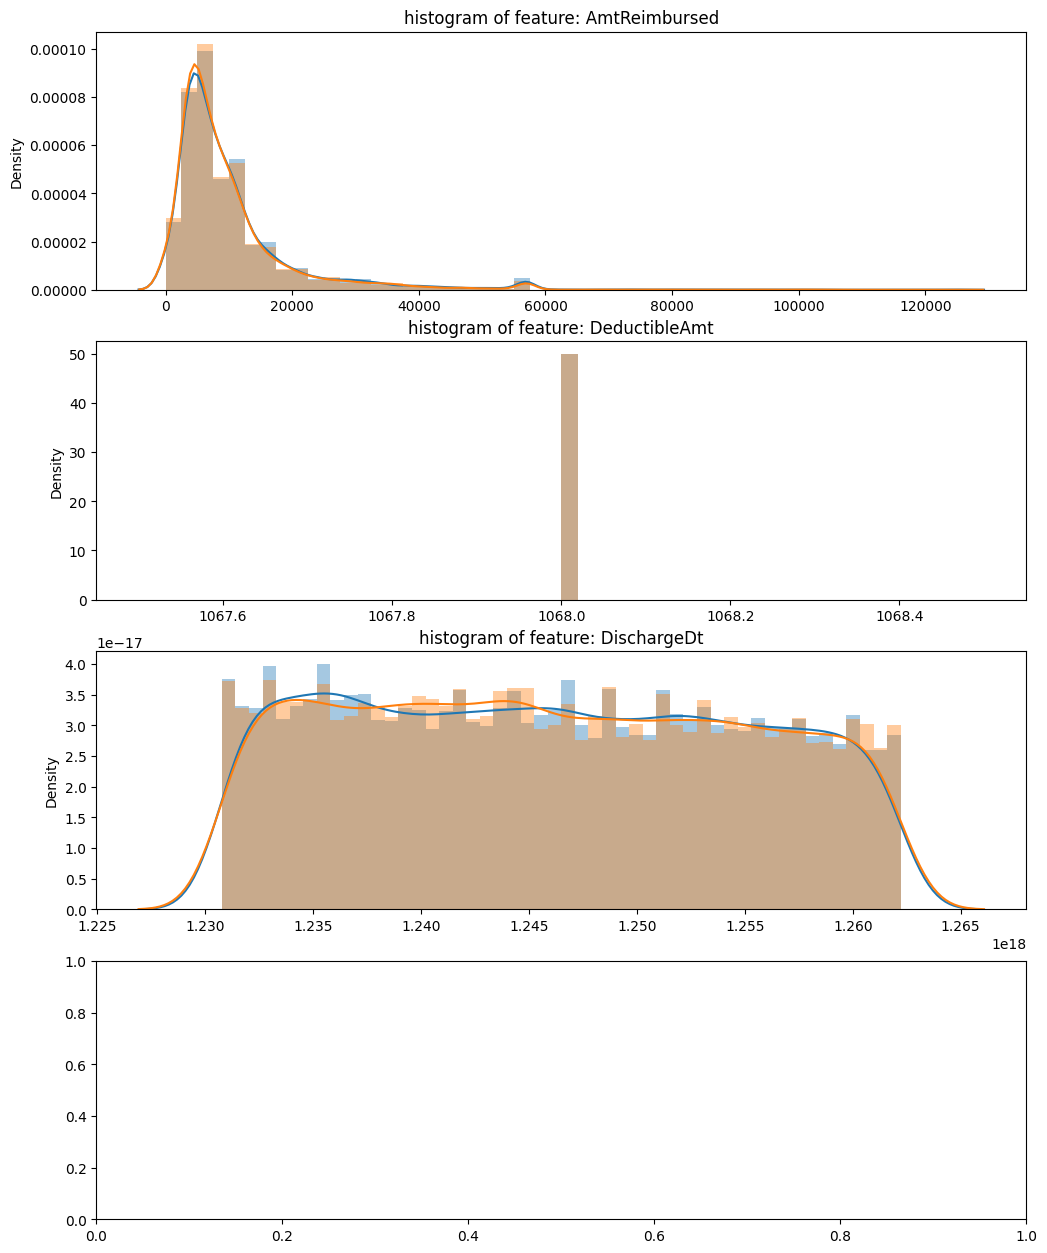

In [24]:
# distribution of anomalous features
data = df_final.copy()
features = ['AmtReimbursed', 'DeductibleAmt', 'DischargeDt',
       'DiagnosisGroupCode', 'DiagnosisCode_1', 'DiagnosisCode_2',
       'DiagnosisCode_3', 'DiagnosisCode_4', 'DiagnosisCode_5',
       'DiagnosisCode_6', 'DiagnosisCode_7', 'DiagnosisCode_8',
       'DiagnosisCode_9', 'DiagnosisCode_10', 'ProcedureCode_1',
       'ProcedureCode_2', 'ProcedureCode_3', 'ProcedureCode_4',
       'ProcedureCode_5', 'ProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDisease', 'State', 'County', 'NumOfMonths_PartACov',
       'NumOfMonths_PartBCov', 'Chronic_Alzheimer', 'Chronic_Heartfailure',
       'Chronic_KidneyDisease', 'Chronic_Cancer', 'Chronic_ObstrPulmonary',
       'Chronic_Depression', 'Chronic_Diabetes', 'Chronic_IschemicHeart',
       'Chronic_Osteoporasis', 'Chronic_rheumatoidarthritis', 'Chronic_stroke',
       'InpatientAnnualReimbursementAmt', 'InpatientAnnualDeductibleAmt',
       'OutpatientAnnualReimbursementAmt', 'OutpatientAnnualDeductibleAmt',
       'Fraud']
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.Fraud == 1], bins=50)
 sns.distplot(data[c][data.Fraud == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()